In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
import itertools
import random

# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# from scipy import stats

# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense, LSTM

In [2]:
tickers_split = [
 ['ABBV', 'ACN', 'AEP', 'AIZ', 'ALLE', 'AMAT', 'AMP', 'AMZN', 'AVB'],
 ['AVY', 'AXP', 'BDX', 'BF-B', 'BMY', 'BR', 'CARR', 'CDW', 'CE', 'CHTR'],
 ['CNC', 'CNP', 'COP', 'CTAS', 'CZR', 'DG', 'DPZ', 'DXC', 'META', 'FTV'],
 ['GOOG', 'GPC', 'HIG', 'HST', 'JPM', 'KR', 'OGN', 'PG', 'PPL', 'PRU'],
 ['PYPL', 'ROL', 'ROST', 'UNH', 'URI', 'V', 'VRSK', 'WRK', 'XOM', 'IVV'],
 ['IWM', 'EWU', 'EWG', 'EWL', 'EWQ', 'IEUS', 'EWJ', 'EWT', 'MCHI'],
 ['INDA', 'EWY', 'EWA', 'EWH', 'EWZ', 'EWC', 'IEMG', 'LQD', 'HYG', 'SHY'],
 ['IEF', 'TLT', 'SEGA.L', 'IEAA.L', 'HIGH.L', 'JPEA.L', 'IAU', 'SLV', 'GSG', 'REET'],
 ['ICLN', 'IXN', 'IGF', 'IUVL.L', 'IUMO.L', 'SPMV.L', 'IEVL.L', 'IEFM.L', 'MVEU.L', 'XLK'],
 ['XLF', 'XLV', 'XLE', 'XLY', 'XLI', 'XLC', 'XLU', 'XLP', 'XLB', 'VXX']
 ]

# Flatten it into a single list of values
tickers_split = [item for sublist in tickers_split for item in sublist]

In [3]:
# Dataset
data_name = 'm6' # 'm6' or 'djia'

# Data preprocessing
index_col = 0
shrink = 0.1
feature_range = (0, 1)
train_test_split = 0.8

# Training
lstm_units = 50
epochs = 20
batch_size = 10

# Maximal window size
max_window = 2

# Load data
data_file = 'data_original_'+str(data_name)+'.csv'
data_original = pd.read_csv(data_file, index_col=index_col)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

In [4]:
# rtn_today_list = []
# rtn_yesterady_list = []
corr_list = []

for ticker in data_original.columns:

    # Calculate the daily returns
    rtn_today = data_original[ticker].pct_change()

    # Shift the returns to align today's returns with yesterday's
    rtn_yesterady = rtn_today.shift(1)

    # Calculate the correlation
    correlation = rtn_today.corr(rtn_yesterady)
    corr_list.append(correlation)

In [5]:
# rtn_today = data_original['ABBV'].pct_change()
# rtn_yesterady = rtn_today.shift(1)
# correlation = rtn_today.corr(rtn_yesterady)
# correlation

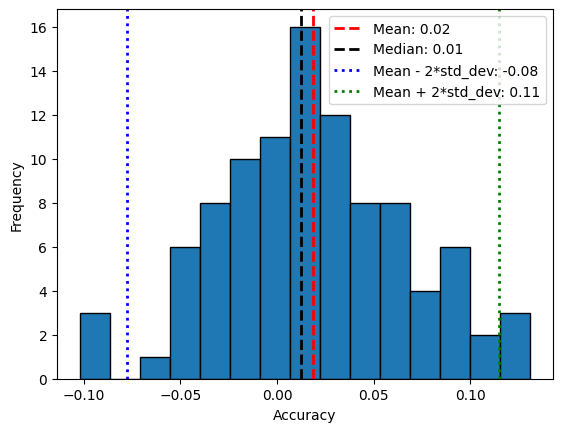

In [6]:
import matplotlib.pyplot as plt
import numpy as np

results = corr_list

# Assuming results is a list or a pandas Series
plt.hist(results, bins=15, edgecolor='black')

# Calculate mean, median, and standard deviation
mean = np.mean(results)
median = np.median(results)
std_dev = np.std(results)

# Add vertical lines for mean, median, and mean ± 2 standard deviations
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='k', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
plt.axvline(mean - 2*std_dev, color='b', linestyle='dotted', linewidth=2, label=f'Mean - 2*std_dev: {mean - 2*std_dev:.2f}')
plt.axvline(mean + 2*std_dev, color='g', linestyle='dotted', linewidth=2, label=f'Mean + 2*std_dev: {mean + 2*std_dev:.2f}')

# plt.title(f'Accuracy over {random_number+1} runs (stratified column: {strata_column.name})')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')

# Add legend
plt.legend()

plt.show()